In [27]:
import numpy as np
import pandas as pd
from numpy import log, exp, sqrt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')
import numpy.random as npr


In [28]:
def BS_Call_Exact(S,X,r,sigma,T,t):

    d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
    d2 = d1-sigma*sqrt((T-t))
    
    ST = S*stats.norm.cdf(d1) - X*exp(-r*(T-t))*stats.norm.cdf(d2)
    
    return ST

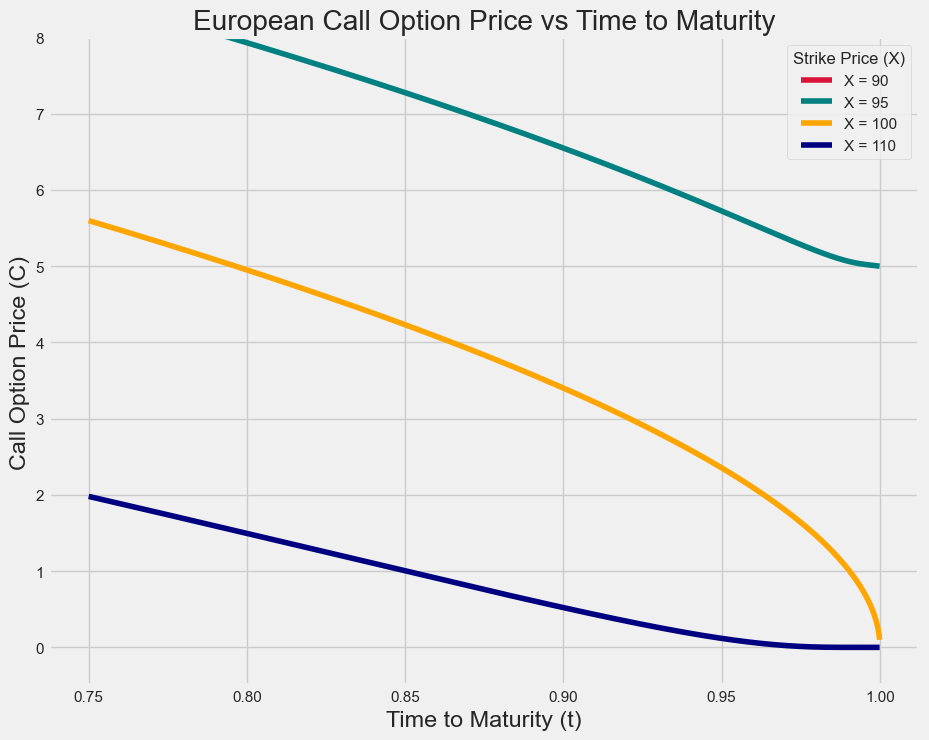

In [16]:
t = np.arange(0.75, 1.0, 0.0001)

plt.figure(figsize=(10, 8))

sns.lineplot(x=t, y=BS_Call_Exact(100, 90, 0.05, 0.25, 1, t), label='X = 90', color='crimson')
sns.lineplot(x=t, y=BS_Call_Exact(100, 95, 0.05, 0.25, 1, t), label='X = 95', color='teal')
sns.lineplot(x=t, y=BS_Call_Exact(100, 100, 0.05, 0.25, 1, t), label='X = 100', color='orange')
sns.lineplot(x=t, y=BS_Call_Exact(100, 110, 0.05, 0.25, 1, t), label='X = 110', color='navy')

plt.xlabel('Time to Maturity (t)')
plt.ylabel('Call Option Price (C)')
plt.ylim(-0.5, 8)
plt.title('European Call Option Price vs Time to Maturity')

plt.legend(title='Strike Price (X)')
plt.grid(True)
plt.show()


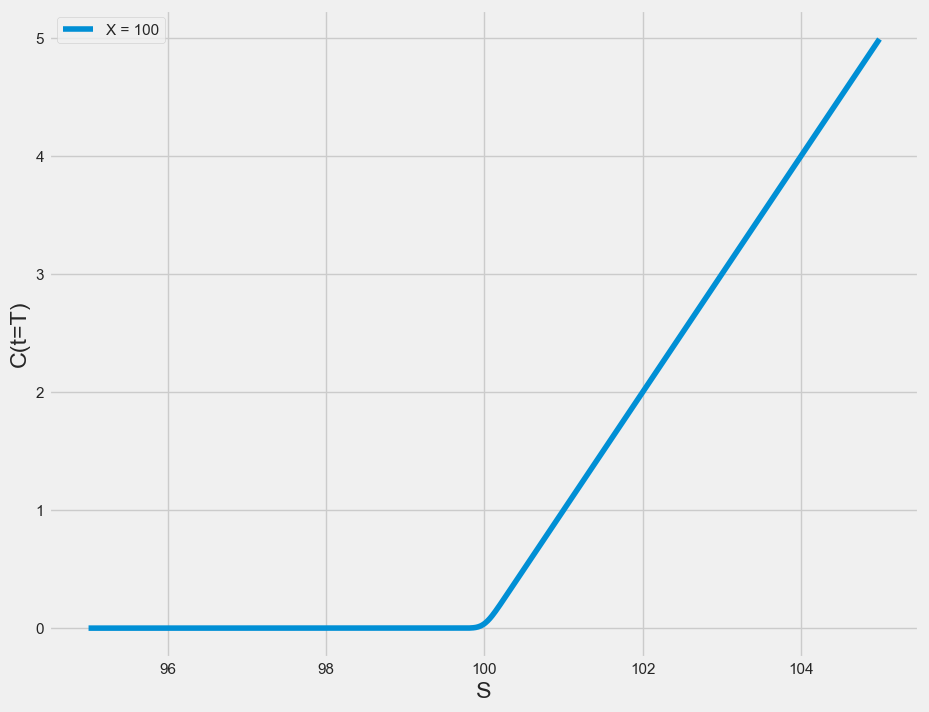

In [17]:
s = np.arange(95, 105, 0.01)

plt.figure(figsize=(10, 8))

sns.lineplot(x=s, y=BS_Call_Exact(s, 100, 0.06, 0.3, 1, 0.99999), label='X = 100')

plt.xlabel('S')
plt.ylabel('C(t=T)')

plt.legend()
plt.show()


In [18]:
r=0.06
sigma = 0.3
T = 1.0
S0 = 100

I = 100000
M = 100

dt = T/M

S = np.zeros((M+1, I))
S[0] = S0
for t in range(1,M+1):
    S[t] = S[t-1]*exp((r -0.5*sigma**2)*dt +sigma*sqrt(dt)*npr.standard_normal(I))

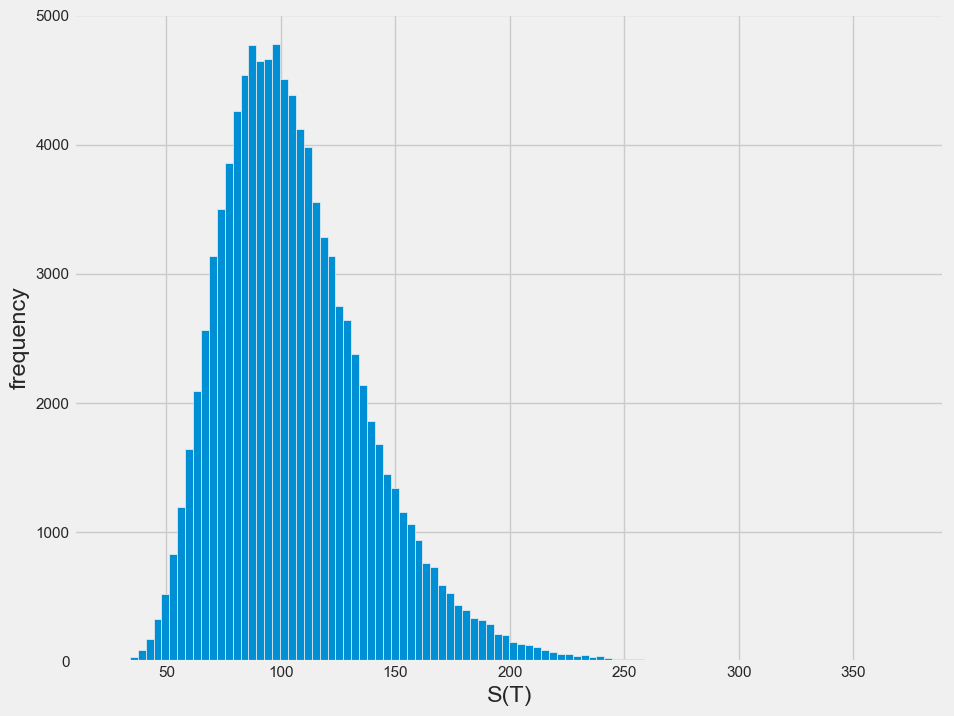

In [19]:
plt.figure(figsize=(10, 8))
plt.hist(S[-1], bins=100)
plt.xlabel('S(T)')
plt.ylabel('frequency')
plt.show()

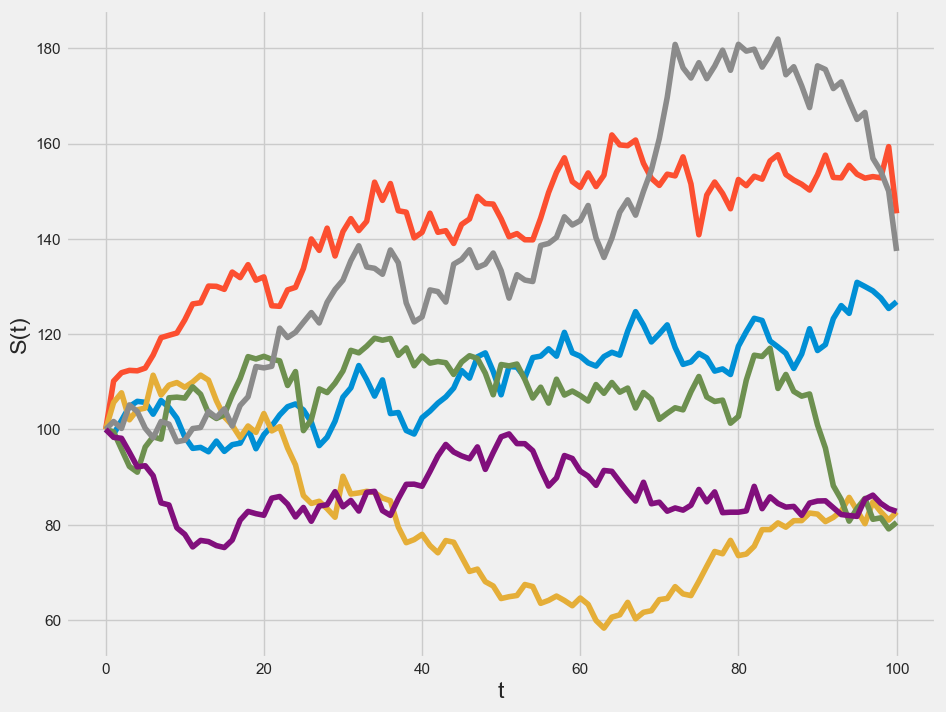

In [20]:
plt.figure(figsize=(10, 8))
plt.plot(S[:, :6])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.show()

In [24]:
def BS_Call_MC(S,X,r,sigma,T,t,I):
    
    data = np.zeros((I, 2))
    
    z = np.random.normal(0, 1, [1, I])
    
    #z = npr.standard_normal(I)
    
    ST = S*exp((T-t)*(r - 0.5*sigma**2)+sigma*sqrt(T-t)*z)
    
    data[:,1] = ST - X
    
    average = np.sum(np.amax(data, axis=1))/float(I)
    
    return np.exp(-r*(T-t))*average

In [25]:
print('Monte Carlo:',BS_Call_MC(100,95,0.06,0.3,1,.999,100000))
print('Exact: ',BS_Call_Exact(100,95,0.06,0.3,1,.999))

Monte Carlo: 5.007841040225365
Exact:  5.005699833982007


In [26]:
print('Monte Carlo:',BS_Call_MC(100,95,0.06,0.3,1,.75,100000))
print('Exact: ',BS_Call_Exact(100,95,0.06,0.3,1,.75))

Monte Carlo: 9.513693048180528
Exact:  9.548802012535894


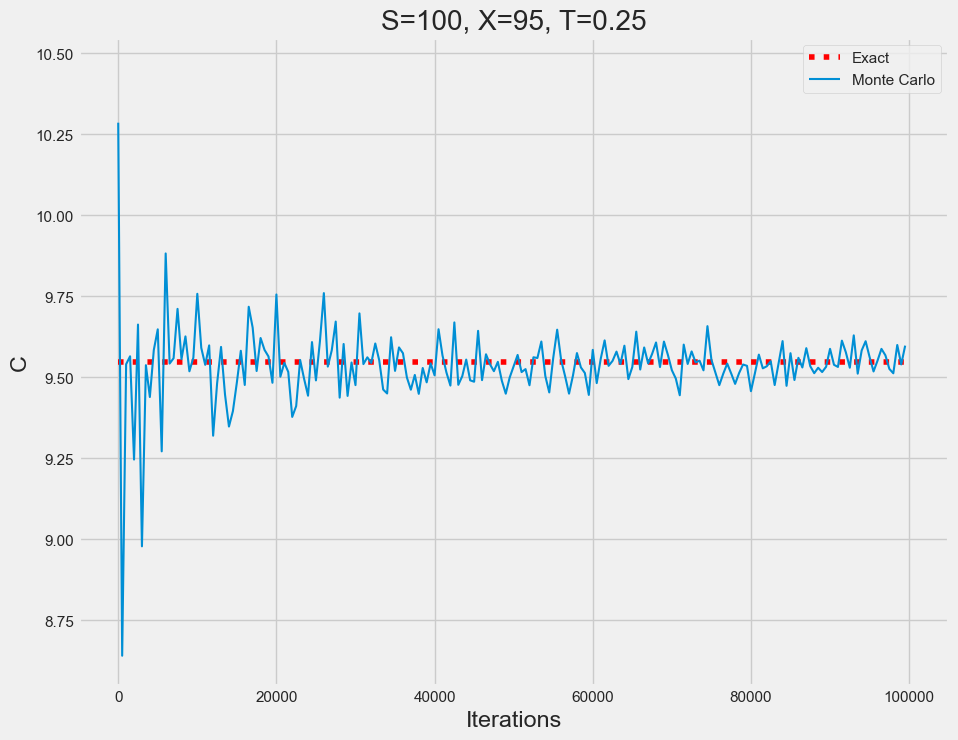

In [11]:
results = []

for i in range(1, 100000, 500):
    results.append({'Iter': i, 'BSc': BS_Call_MC(100, 95, 0.06, 0.3, 1, 0.75, i)})

df = pd.DataFrame(results)

plt.figure(figsize=(10, 8))

plt.hlines(BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.75), xmin=0, xmax=100000,
           linestyle='dotted', colors='red', label='Exact')

plt.plot(df.set_index('Iter'), lw=1.5, label='Monte Carlo')

plt.title('S=100, X=95, T=0.25')
plt.xlabel('Iterations')
plt.ylabel('C')
plt.ylim(
    BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.75) - 1,
    BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.75) + 1
)
plt.legend()
plt.show()


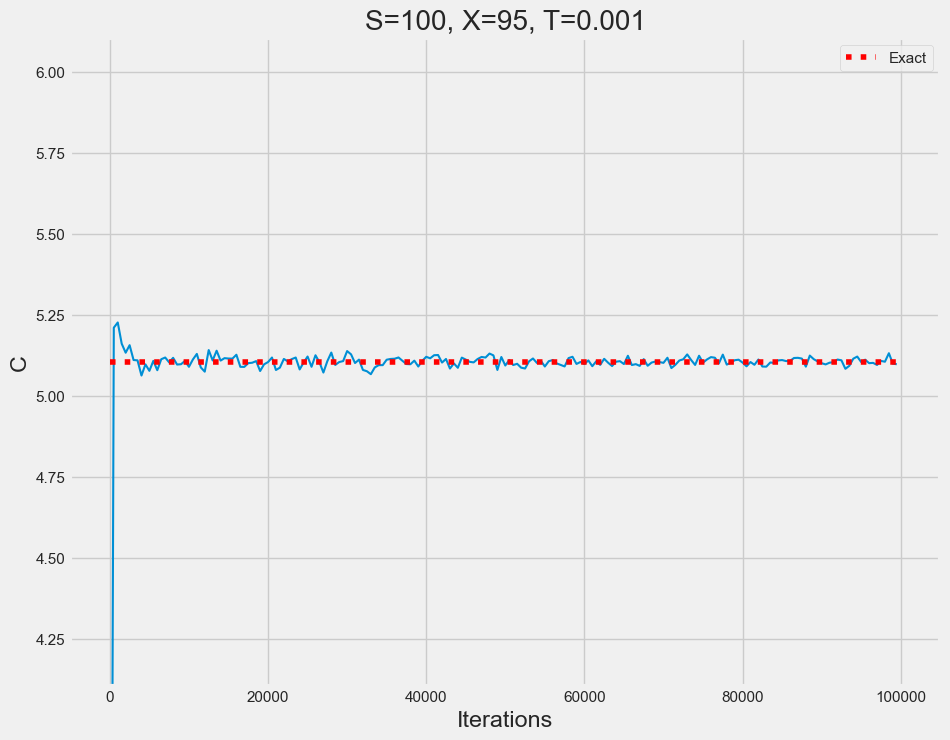

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

results = []

for i in range(1, 100000, 500):
    results.append({'Iter': i, 'BSc': BS_Call_MC(100, 95, 0.06, 0.3, 1, 0.99, i)})

df = pd.DataFrame(results)

plt.figure(figsize=(10, 8))

plt.plot(df.set_index('Iter'), lw=1.5)
plt.hlines(
    BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.99),
    xmin=0,
    xmax=100000,
    linestyle='dotted',
    colors='red',
    label='Exact'
)

plt.title('S=100, X=95, T=0.001')
plt.xlabel('Iterations')
plt.ylabel('C')
plt.ylim(
    BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.99) - 1,
    BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.99) + 1
)
plt.legend()
plt.show()


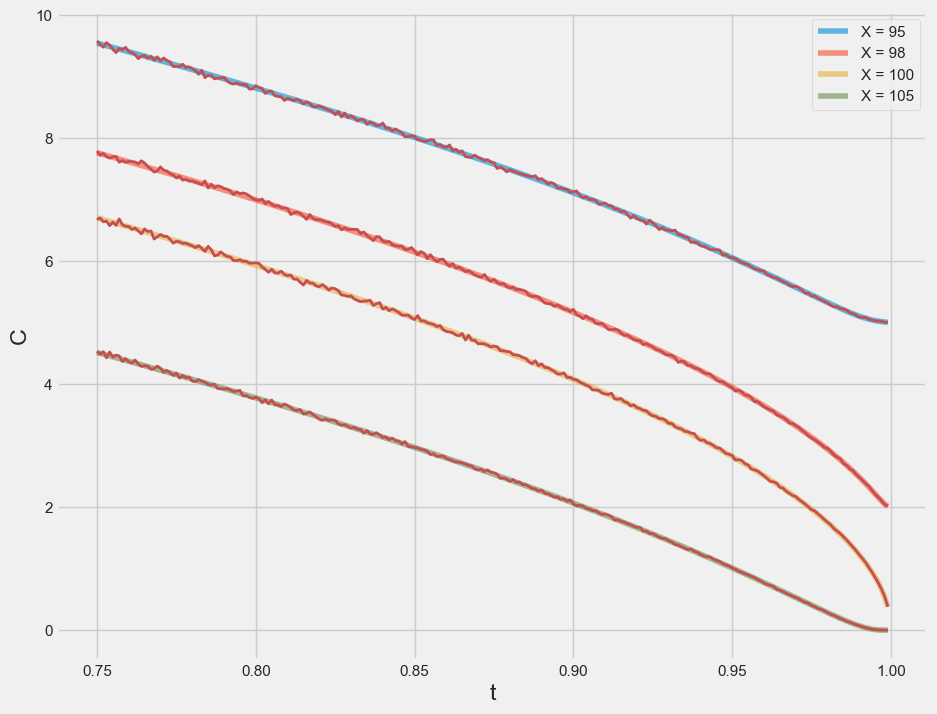

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

results = []
t = np.arange(0.75, 1.0, 0.001)

for i in t:
    results.append({
        't': i,
        '95': BS_Call_MC(100, 95, 0.06, 0.3, 1, i, 100000),
        '98': BS_Call_MC(100, 98, 0.06, 0.3, 1, i, 100000),
        '100': BS_Call_MC(100, 100, 0.06, 0.3, 1, i, 100000),
        '105': BS_Call_MC(100, 105, 0.06, 0.3, 1, i, 100000)
    })

df = pd.DataFrame(results)

plt.figure(figsize=(10, 8))

plt.plot(t, BS_Call_Exact(100, 95, 0.06, 0.3, 1, t), alpha=0.6, label='X = 95')
plt.plot(t, BS_Call_Exact(100, 98, 0.06, 0.3, 1, t), alpha=0.6, label='X = 98')
plt.plot(t, BS_Call_Exact(100, 100, 0.06, 0.3, 1, t), alpha=0.6, label='X = 100')
plt.plot(t, BS_Call_Exact(100, 105, 0.06, 0.3, 1, t), alpha=0.6, label='X = 105')

plt.plot(df['t'], df['95'], lw=2, c='r')
plt.plot(df['t'], df['98'], lw=2, c='r')
plt.plot(df['t'], df['100'], lw=2, c='r')
plt.plot(df['t'], df['105'], lw=2, c='r')

plt.legend()
plt.xlabel('t')
plt.ylabel('C')
plt.show()
